## Analyzing Promotion Prediction Data
### Objective 
The goal of this model prediction is to use data analysis and machine learning to predict promotion.</br>
This means the model determine identifying the right people for promotion, based on past data.</br>

### Problem Type
Classification Problem - who are promoted and who are not promoted.</br>
Note : Found that target is 0 or 1 and not a continous data (Classification Problem). </br>


#### Import Libraries Section

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

#### Load Data Section

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')

In [3]:
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


#### Pre-Processing Section
    - Undertsanding the data shape </br>
    - Inforrmation of the meta-data </br>
    - Checking for null values </br>
    - Checking for duplicate values </br>
    - Drop unneccessary columns </br>
    - Fill missing values </br>
    - Seperate Numerical and categorical Columns </br>
    

In [5]:
#dimensions of the given data (rows and columns)
train.shape

(54808, 14)

In [6]:
# Columns info and data  
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
# Check the missing Data
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
# check  for duplicates
train.duplicated().sum()

0

In [9]:
# Find no of unique Values
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [10]:
train['is_promoted'].value_counts(normalize =True)*100
# more than 91% of the data is not promoted
# unbalanced data

is_promoted
0    91.482995
1     8.517005
Name: proportion, dtype: float64

###### Drop unneccessary columns
- Employee ID is unique so we can remove the column.</br>
- Since Years of service is available we can remove age (assuming age is not taken as a criteria for promotion).</br>


In [11]:
target_col  =['is_promoted']
ignore_col  =['employee_id', 'recruitment_channel'] # Not much signification because it is a unique id

In [12]:
train.drop(columns = ignore_col, axis =1, inplace =True) #dropped Columns which we dont need

In [13]:
train.describe() 

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
train.describe(include = 'object') 

,department,region,education,gender
count,54808,54808,52399,54808
unique,9,34,3,2
top,Sales & Marketing,region_2,Bachelor's,m
freq,16840,12343,36669,38496


In [15]:
train.groupby(['department','education']).size().unstack(fill_value=0).T

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
education,,,,,,,,,
Bachelor's,3978,1895,1525,814,7781,4393,542,11099,4642
Below Secondary,0,106,128,65,176,129,0,0,201
Master's & above,1037,499,733,156,3165,2544,429,4166,2196


In [16]:
train['education'].isnull().value_counts()

education
False    52399
True      2409
Name: count, dtype: int64

In [17]:
train['previous_year_rating'].isnull().value_counts()

previous_year_rating
False    50684
True      4124
Name: count, dtype: int64

In [18]:
train.groupby('department').previous_year_rating.mean() # Finding rating mean by department 

department
Analytics            3.557307
Finance              3.506436
HR                   3.482965
Legal                3.405281
Operations           3.632156
Procurement          3.298852
R&D                  3.563596
Sales & Marketing    3.067937
Technology           3.158677
Name: previous_year_rating, dtype: float64

In [19]:
train.groupby(['department'])['education'].agg(pd.Series.mode) # Finding education  by department 

department
Analytics            Bachelor's
Finance              Bachelor's
HR                   Bachelor's
Legal                Bachelor's
Operations           Bachelor's
Procurement          Bachelor's
R&D                  Bachelor's
Sales & Marketing    Bachelor's
Technology           Bachelor's
Name: education, dtype: object

In [20]:
rating_simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Since numerical cloumn mean is taken to impute missing values
train[['previous_year_rating']]= rating_simple_imputer.fit_transform(train[['previous_year_rating']])

In [21]:
education_simple_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
# Since Categorical cloumn mode is taken to impute missing values
train[['education']]= education_simple_imputer.fit_transform(train[['education']])

In [22]:
train['education'].isnull().value_counts() # No Duplicates

education
False    54808
Name: count, dtype: int64

In [23]:
train['previous_year_rating'].isnull().value_counts() # No Duplicates

previous_year_rating
False    54808
Name: count, dtype: int64

In [24]:
# separate category and numeric features

cat_cols = ['department', 'region', 'education', 'gender']           
num_cols = ['no_of_trainings','previous_year_rating','KPIs_met >80%' ,'awards_won?' ,'avg_training_score']

#### EDA - Exploratory Data Analysis Section

##### Univariant Analysis & MultiVariant Analysis

[Text(0, 0, '50140'), Text(0, 0, '4668')]

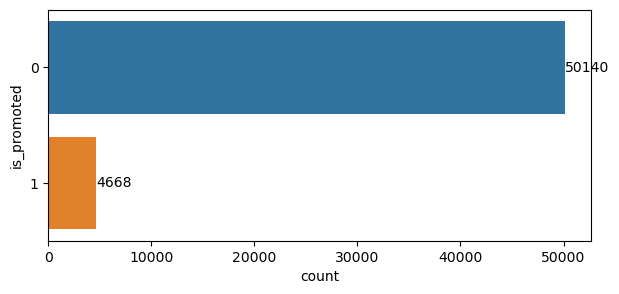

In [25]:
# Get the no of persons who are promoted and non promoted based on train data.
fig, ax = plt.subplots(figsize=(7, 3)) # setting the dimensions of the plot
is_promoted = sns.countplot(y='is_promoted', data=train, ax = ax )
is_promoted.bar_label(is_promoted.containers[0])

<Axes: xlabel='no_of_trainings', ylabel='Density'>

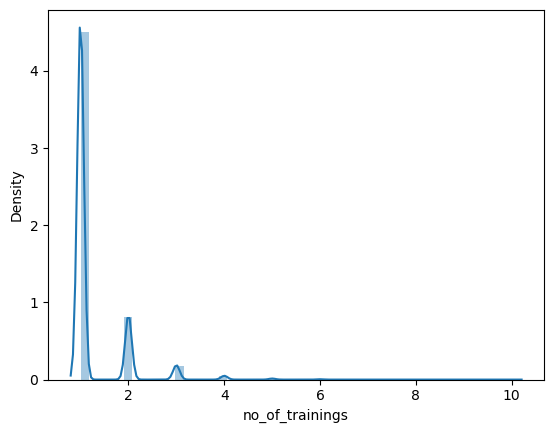

In [26]:
sns.distplot(train.no_of_trainings)
# Most od the candidates has taken only one training

<Axes: xlabel='previous_year_rating', ylabel='Density'>

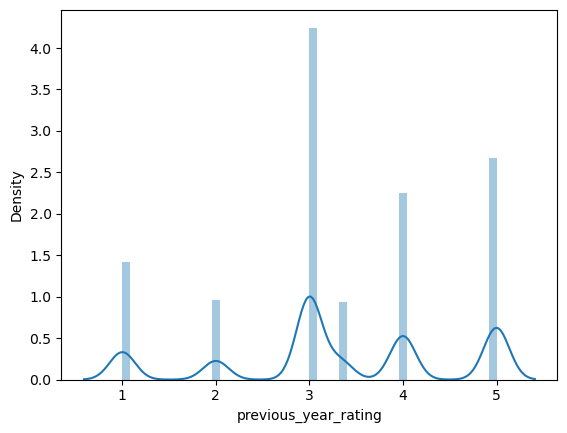

In [27]:
sns.distplot(train.previous_year_rating )
# Most od the candidates little ore than 3 has there previous rating

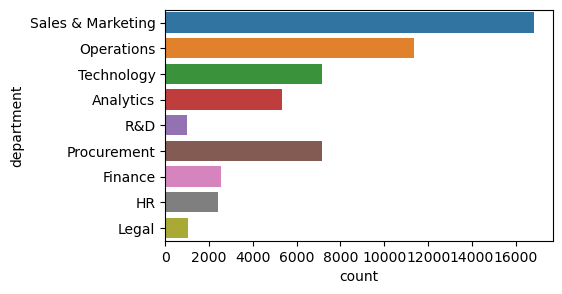

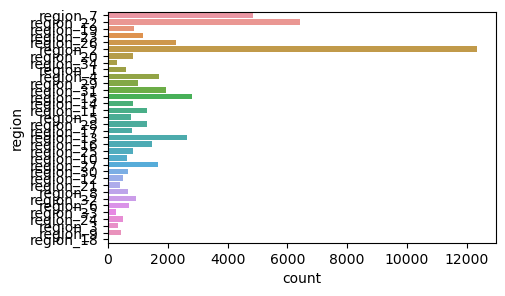

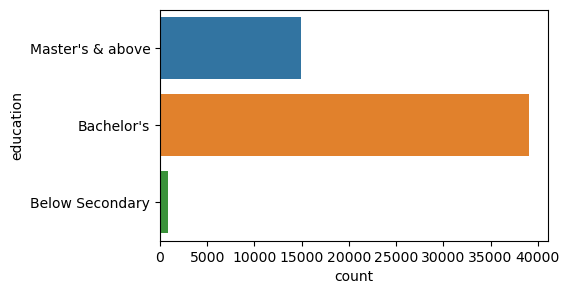

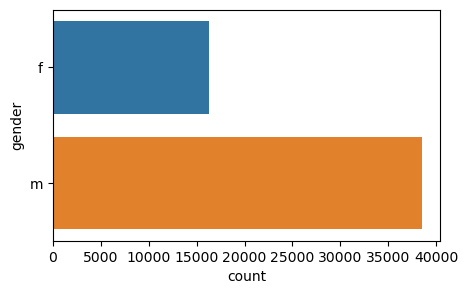

In [28]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(y=train[col])
    plt.show()

# Sales and marketing has highest no of data
#most of them have bachelors degree
# Female workforce is low when compared to male
# Employees Reffered are very less
# Region 2 has more no of data nearly 50% than than the second large region but 6th in promotions
# Highest Promotion is region 4
# avg_training_score has some influence in Promotion

In [29]:
train['region'].value_counts() 

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

<Axes: xlabel='is_promoted', ylabel='region'>

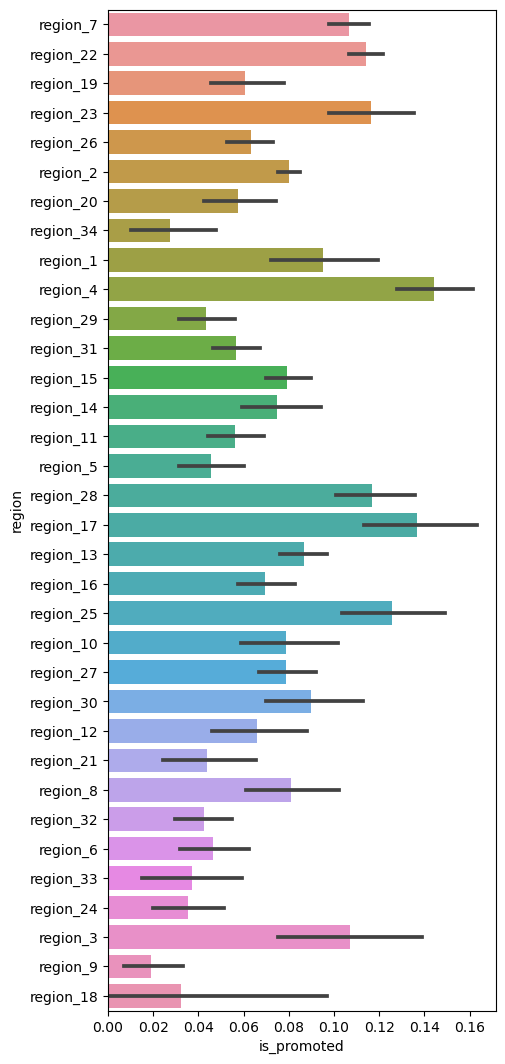

In [30]:
fig, ax = plt.subplots(figsize=(5,13)) # setting the dimensions of the plot
sns.barplot(train, x="is_promoted", y="region" ,ax =ax)

<Axes: >

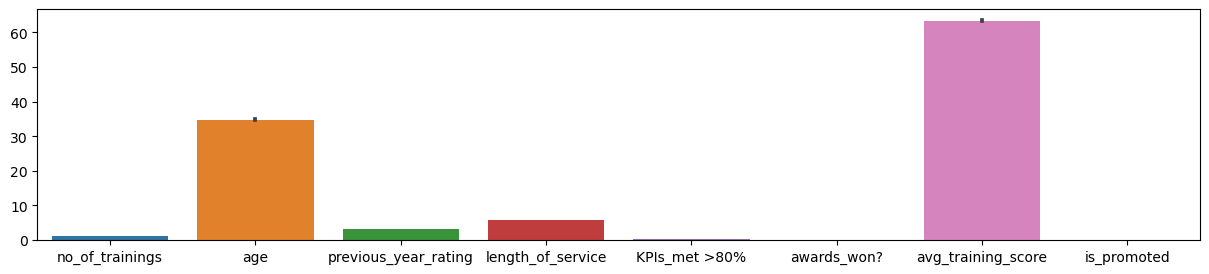

In [31]:
fig, ax = plt.subplots(figsize=(15, 3)) # setting the dimensions of the plot
sns.barplot(train,ax =ax)

<Axes: xlabel='education', ylabel='is_promoted'>

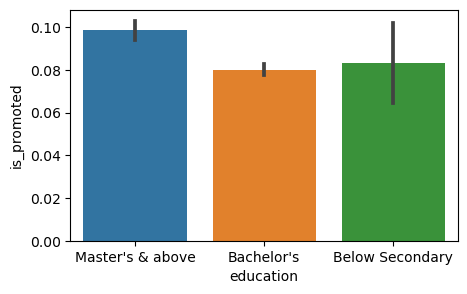

In [32]:
fig, ax = plt.subplots(figsize=(5, 3)) # setting the dimensions of the plot
sns.barplot(train, x="education", y="is_promoted",ax =ax)

<Axes: xlabel='avg_training_score', ylabel='length_of_service'>

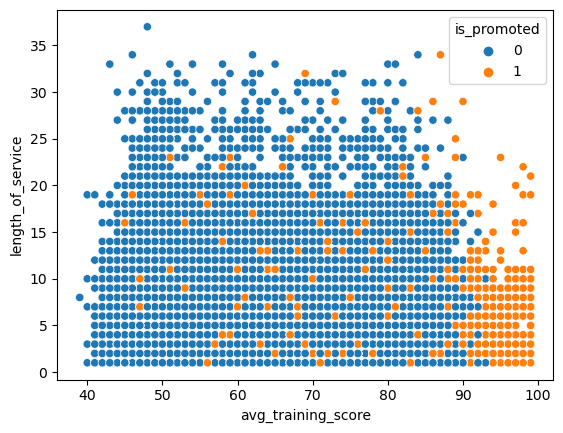

In [33]:
sns.scatterplot(train, x="avg_training_score", y="length_of_service", hue = "is_promoted")

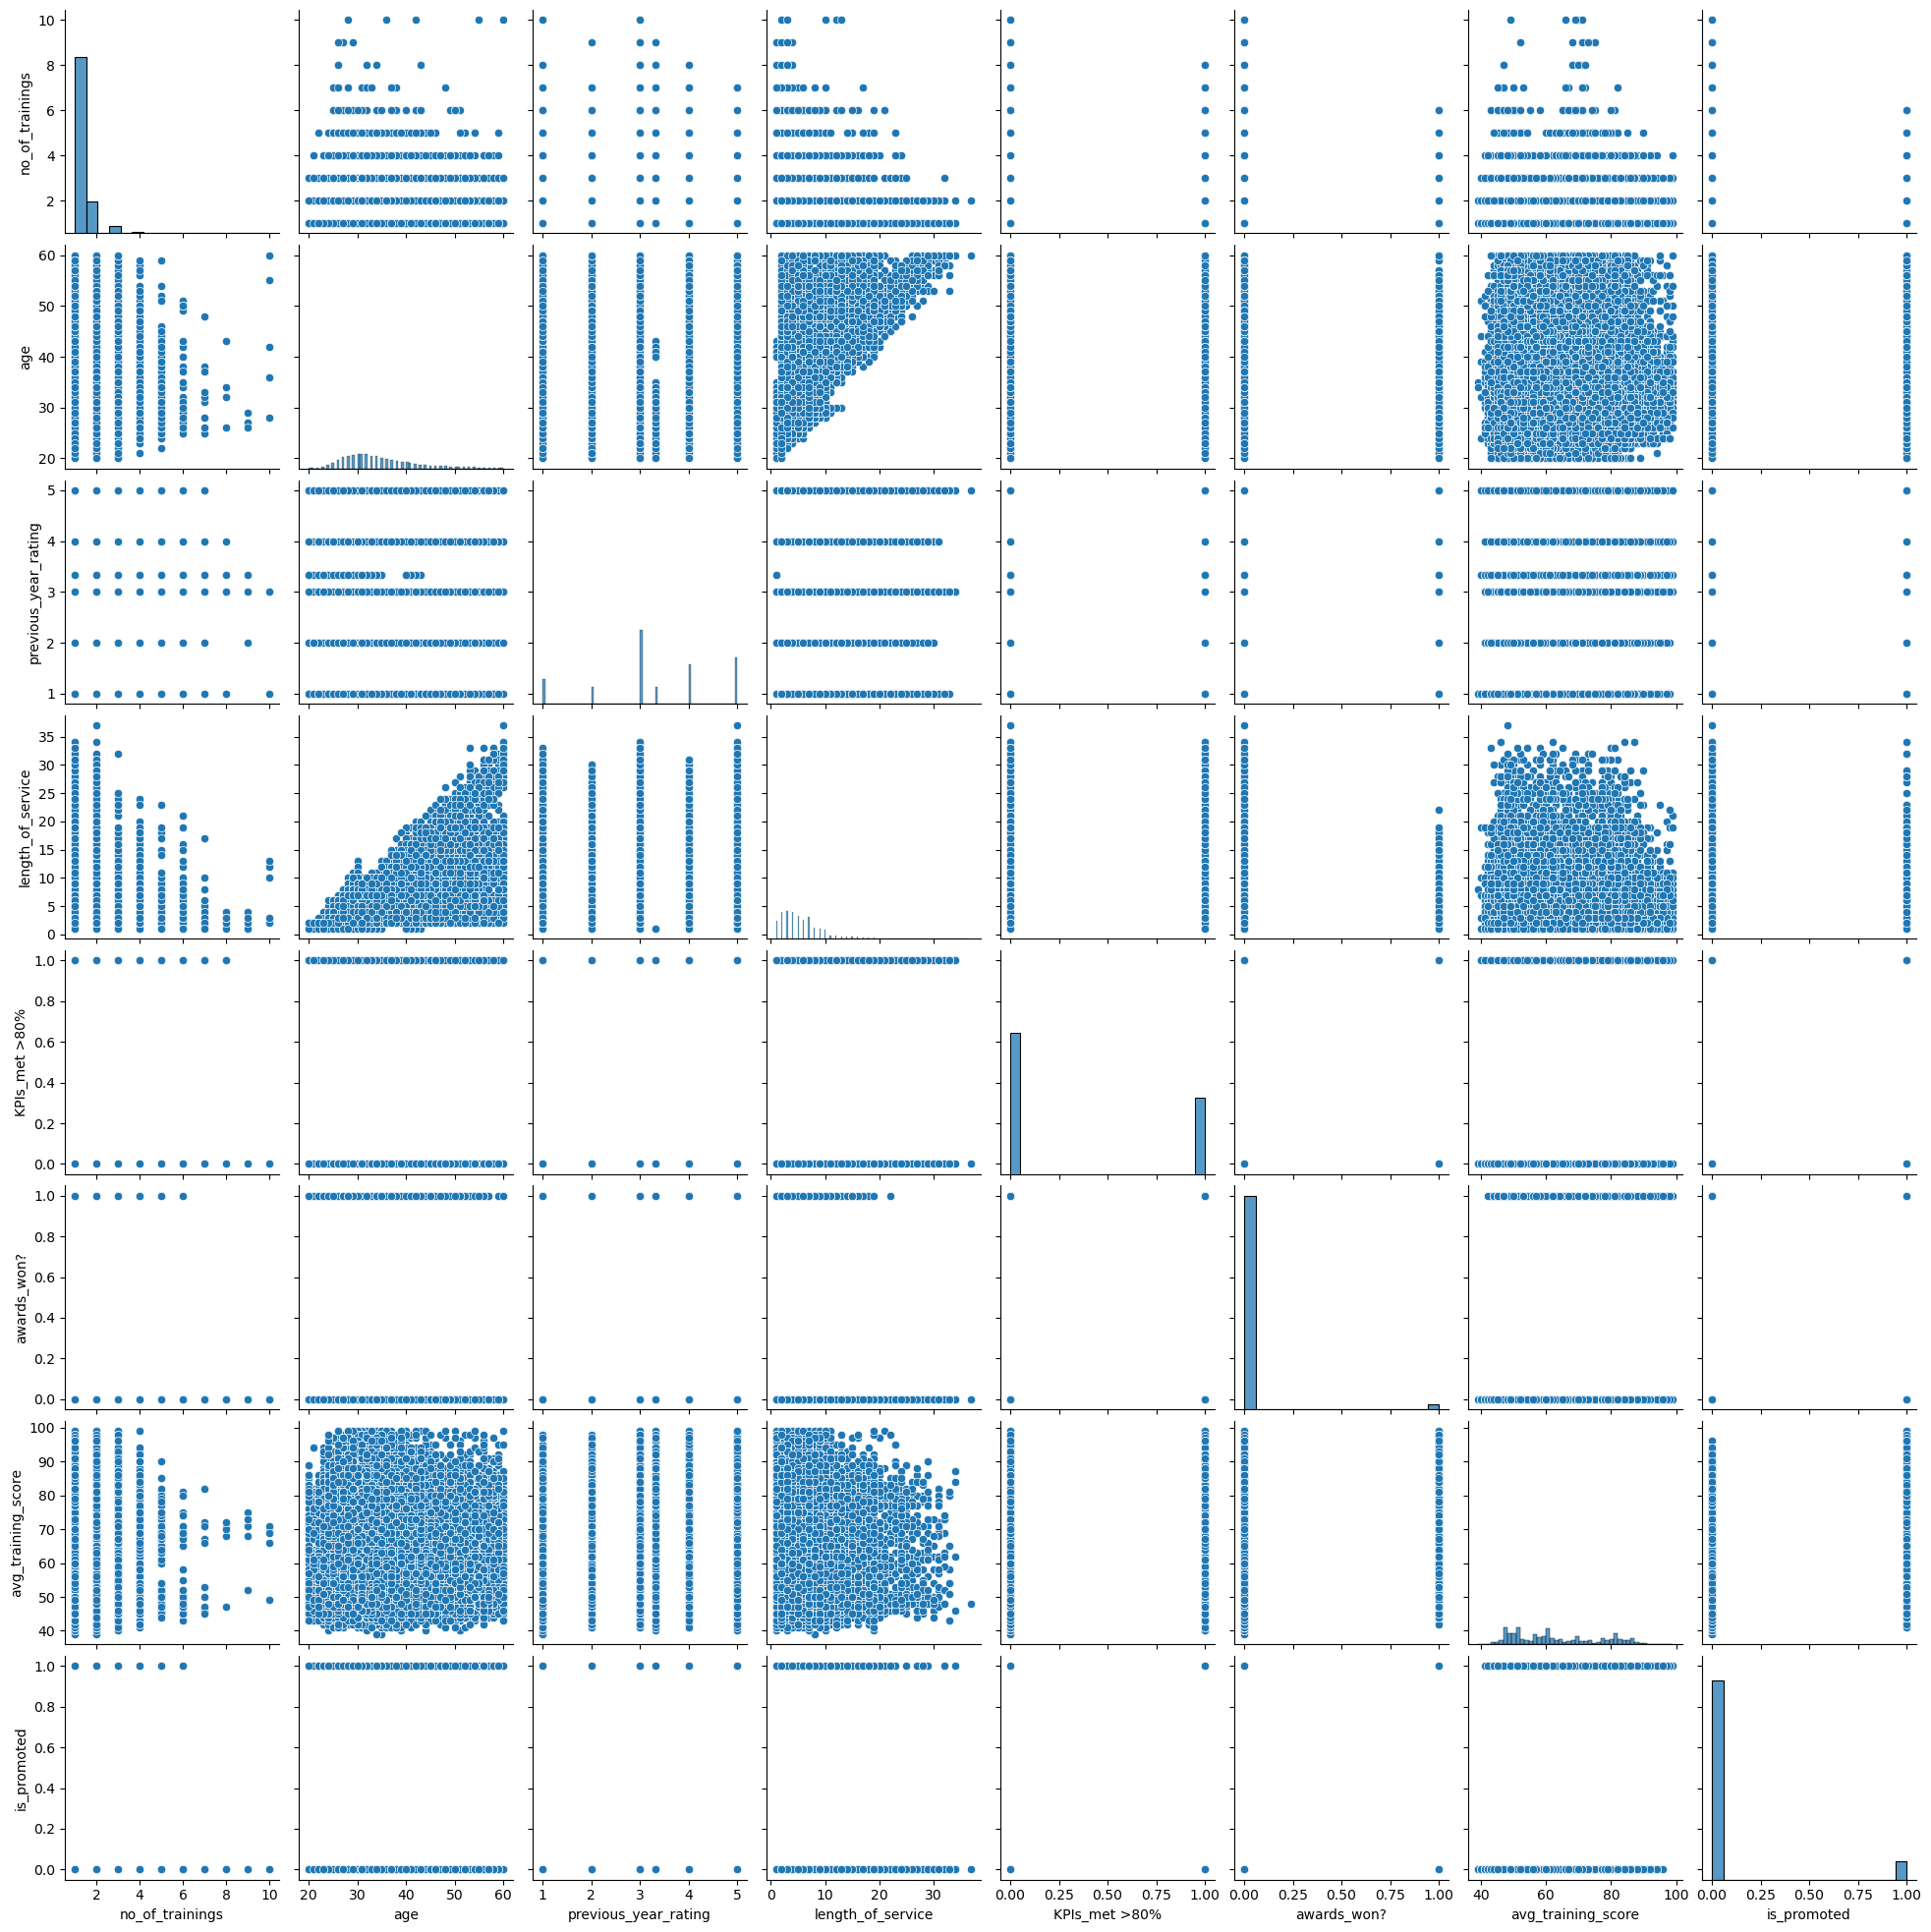

In [34]:
sns.pairplot( data = train )

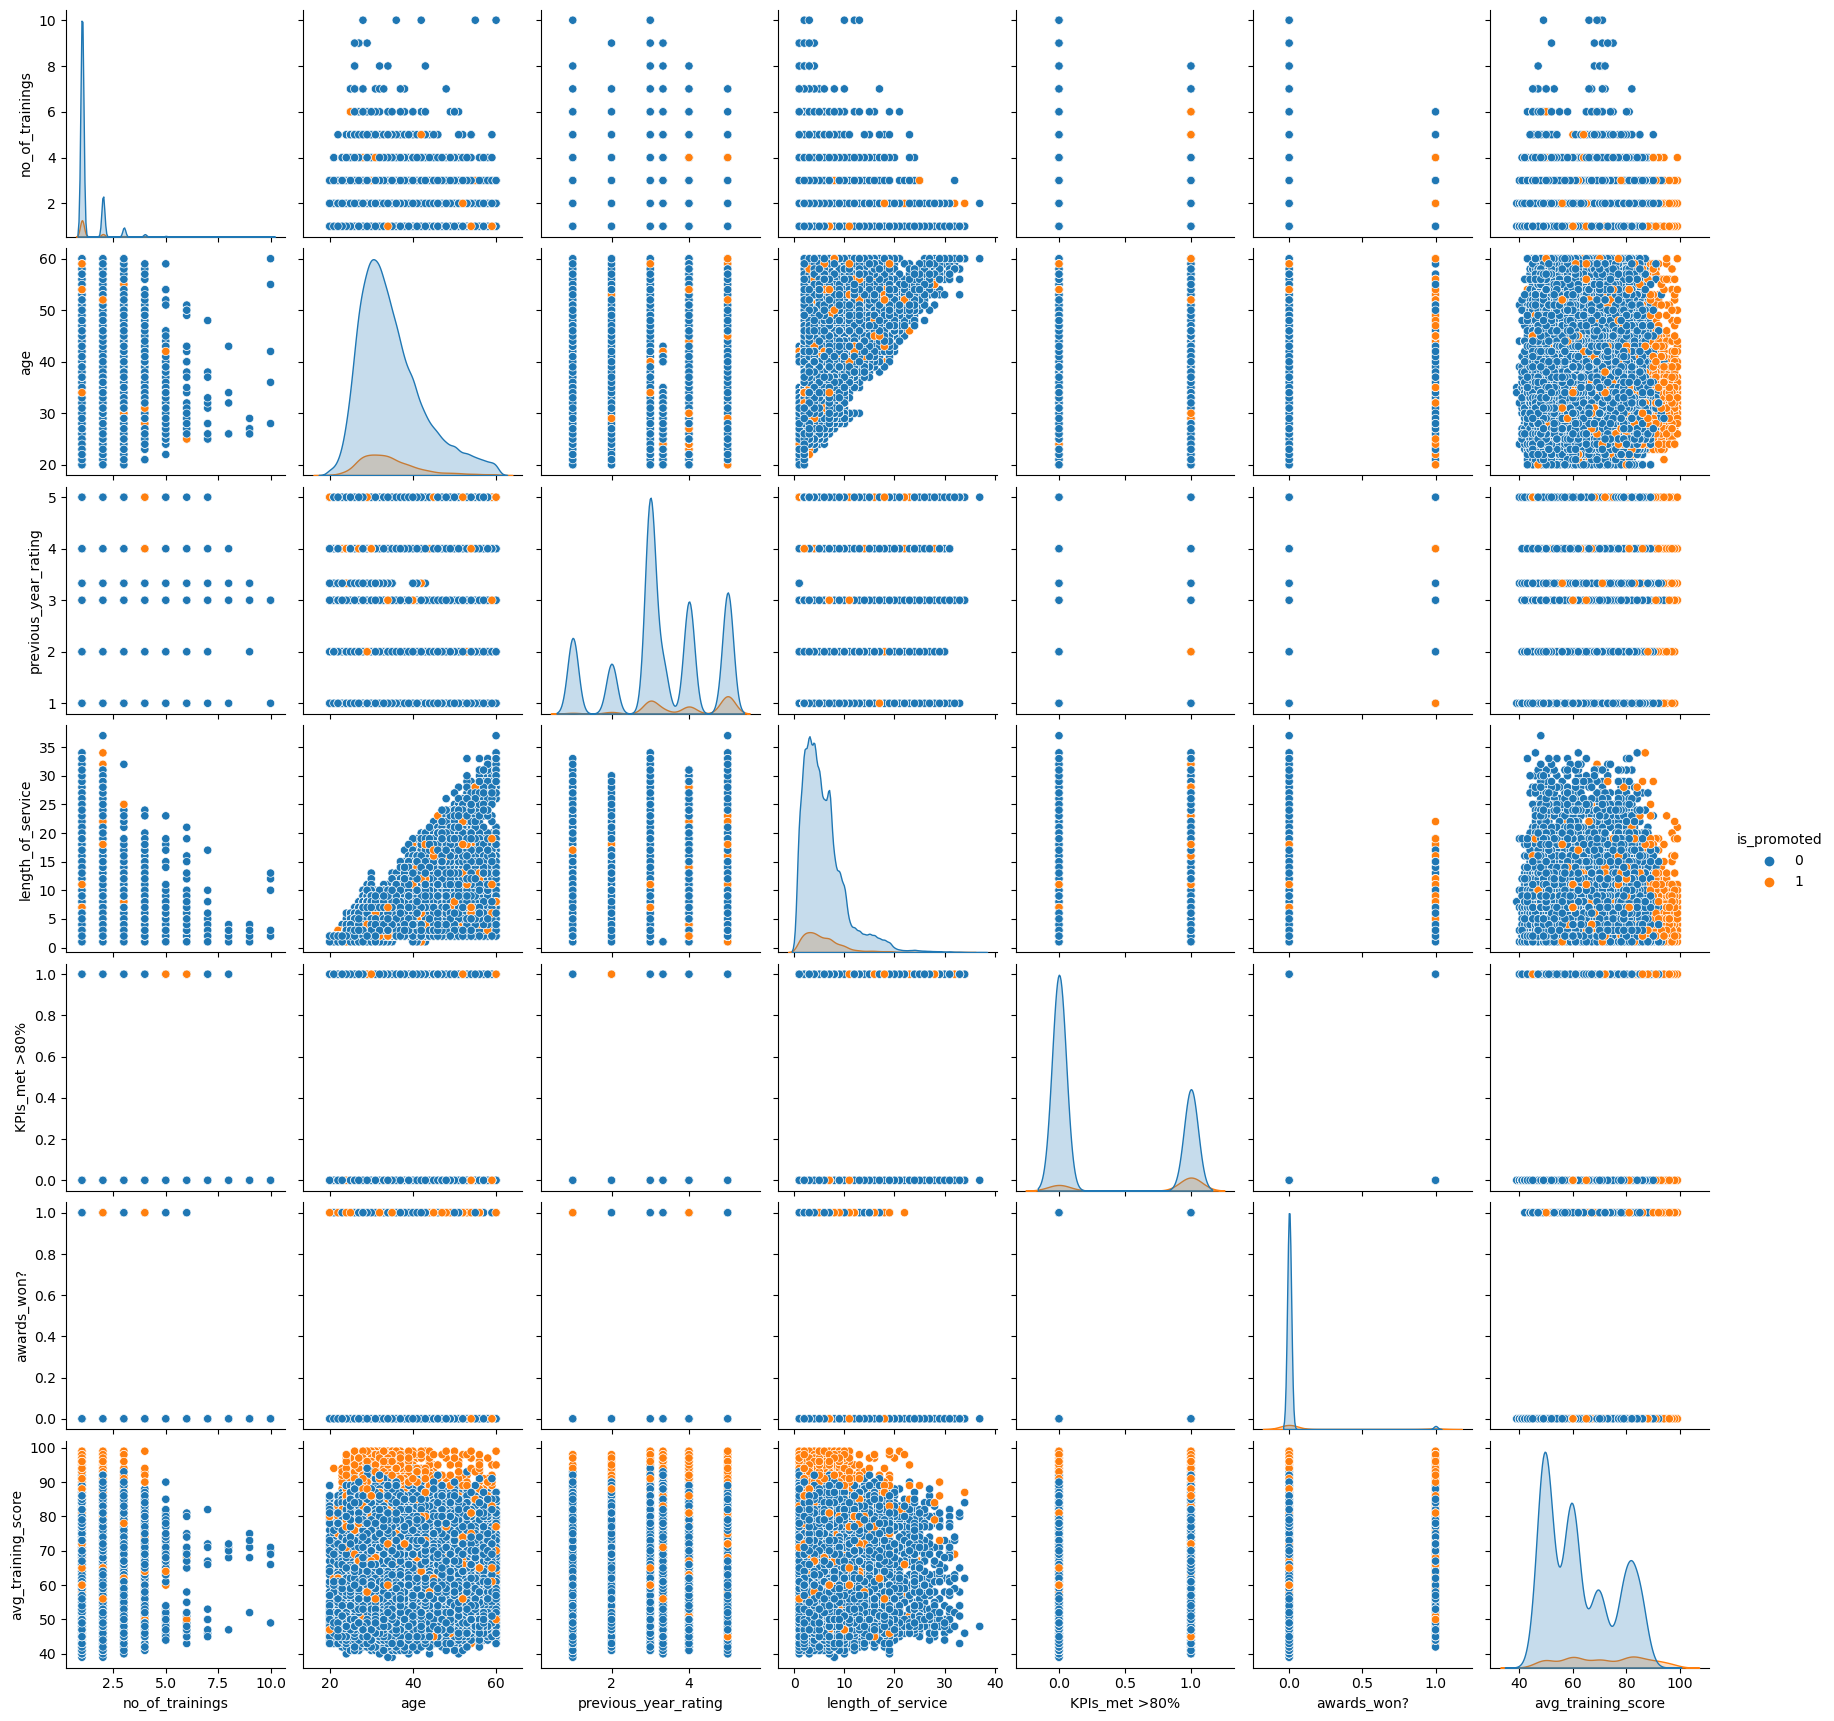

<Axes: xlabel='length_of_service', ylabel='avg_training_score'>

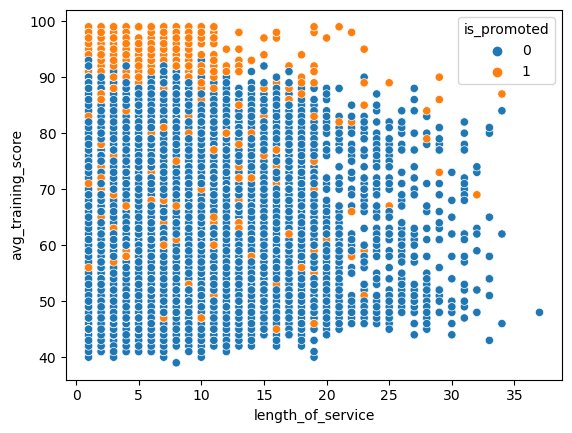

In [36]:
sns.scatterplot(data=train, x='length_of_service' , y='avg_training_score' , hue = 'is_promoted')


<Axes: xlabel='department', ylabel='length_of_service'>

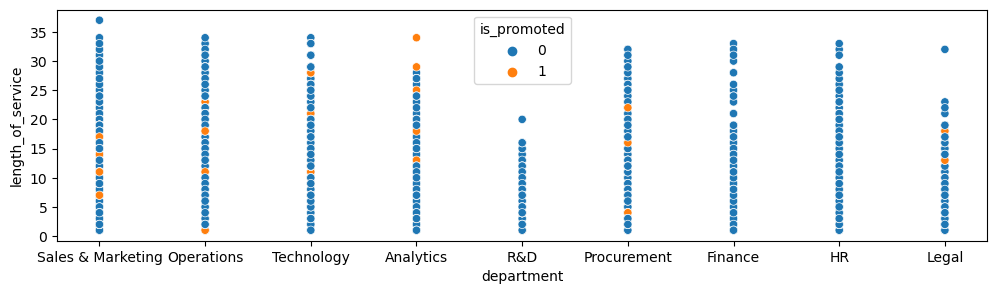

In [37]:
fig, ax = plt.subplots(figsize=(12, 3)) # setting the dimensions of the plot
sns.scatterplot(x = 'department', y = 'length_of_service', hue = 'is_promoted', data = train, ax =ax )


<Axes: xlabel='KPIs_met >80%', ylabel='avg_training_score'>

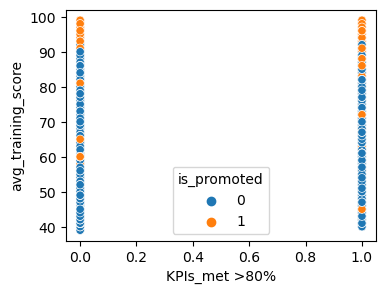

In [38]:
fig, ax = plt.subplots(figsize=(4, 3)) # setting the dimensions of the plot
sns.scatterplot(x = 'KPIs_met >80%', y = 'avg_training_score', hue = 'is_promoted', data = train, ax =ax )

<Axes: xlabel='department', ylabel='avg_training_score'>

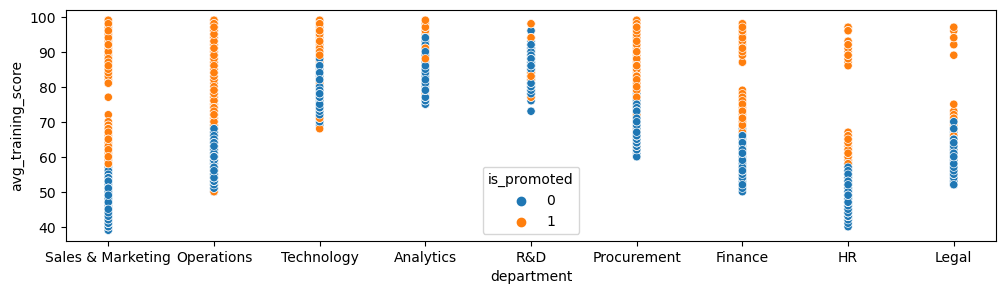

In [39]:
fig, ax = plt.subplots(figsize=(12, 3)) # setting the dimensions of the plot
sns.scatterplot(x = 'department', y = 'avg_training_score', hue = 'is_promoted', data = train, ax =ax )

<Axes: xlabel='department', ylabel='avg_training_score'>

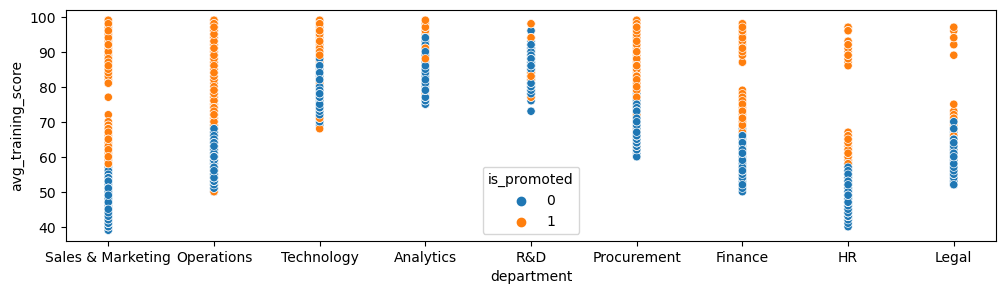

In [40]:
fig, ax = plt.subplots(figsize=(12, 3)) # setting the dimensions of the plot
sns.scatterplot(x = 'department', y = 'avg_training_score', hue = 'is_promoted', data = train, ax =ax )


<Axes: >

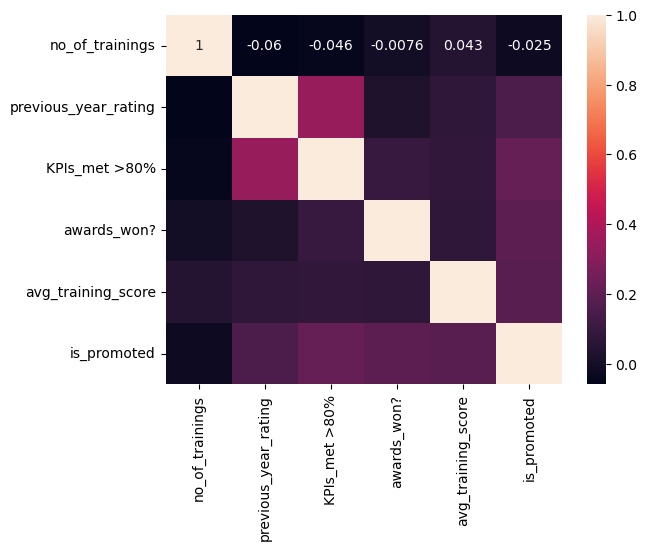

In [41]:
sns.heatmap(pd.concat([train[num_cols],train['is_promoted']], axis=1).corr(), annot=True)


In [42]:
 #KPIs_met >80% and previous_year_rating has some correlation

IndexError: index 4 is out of bounds for axis 0 with size 4

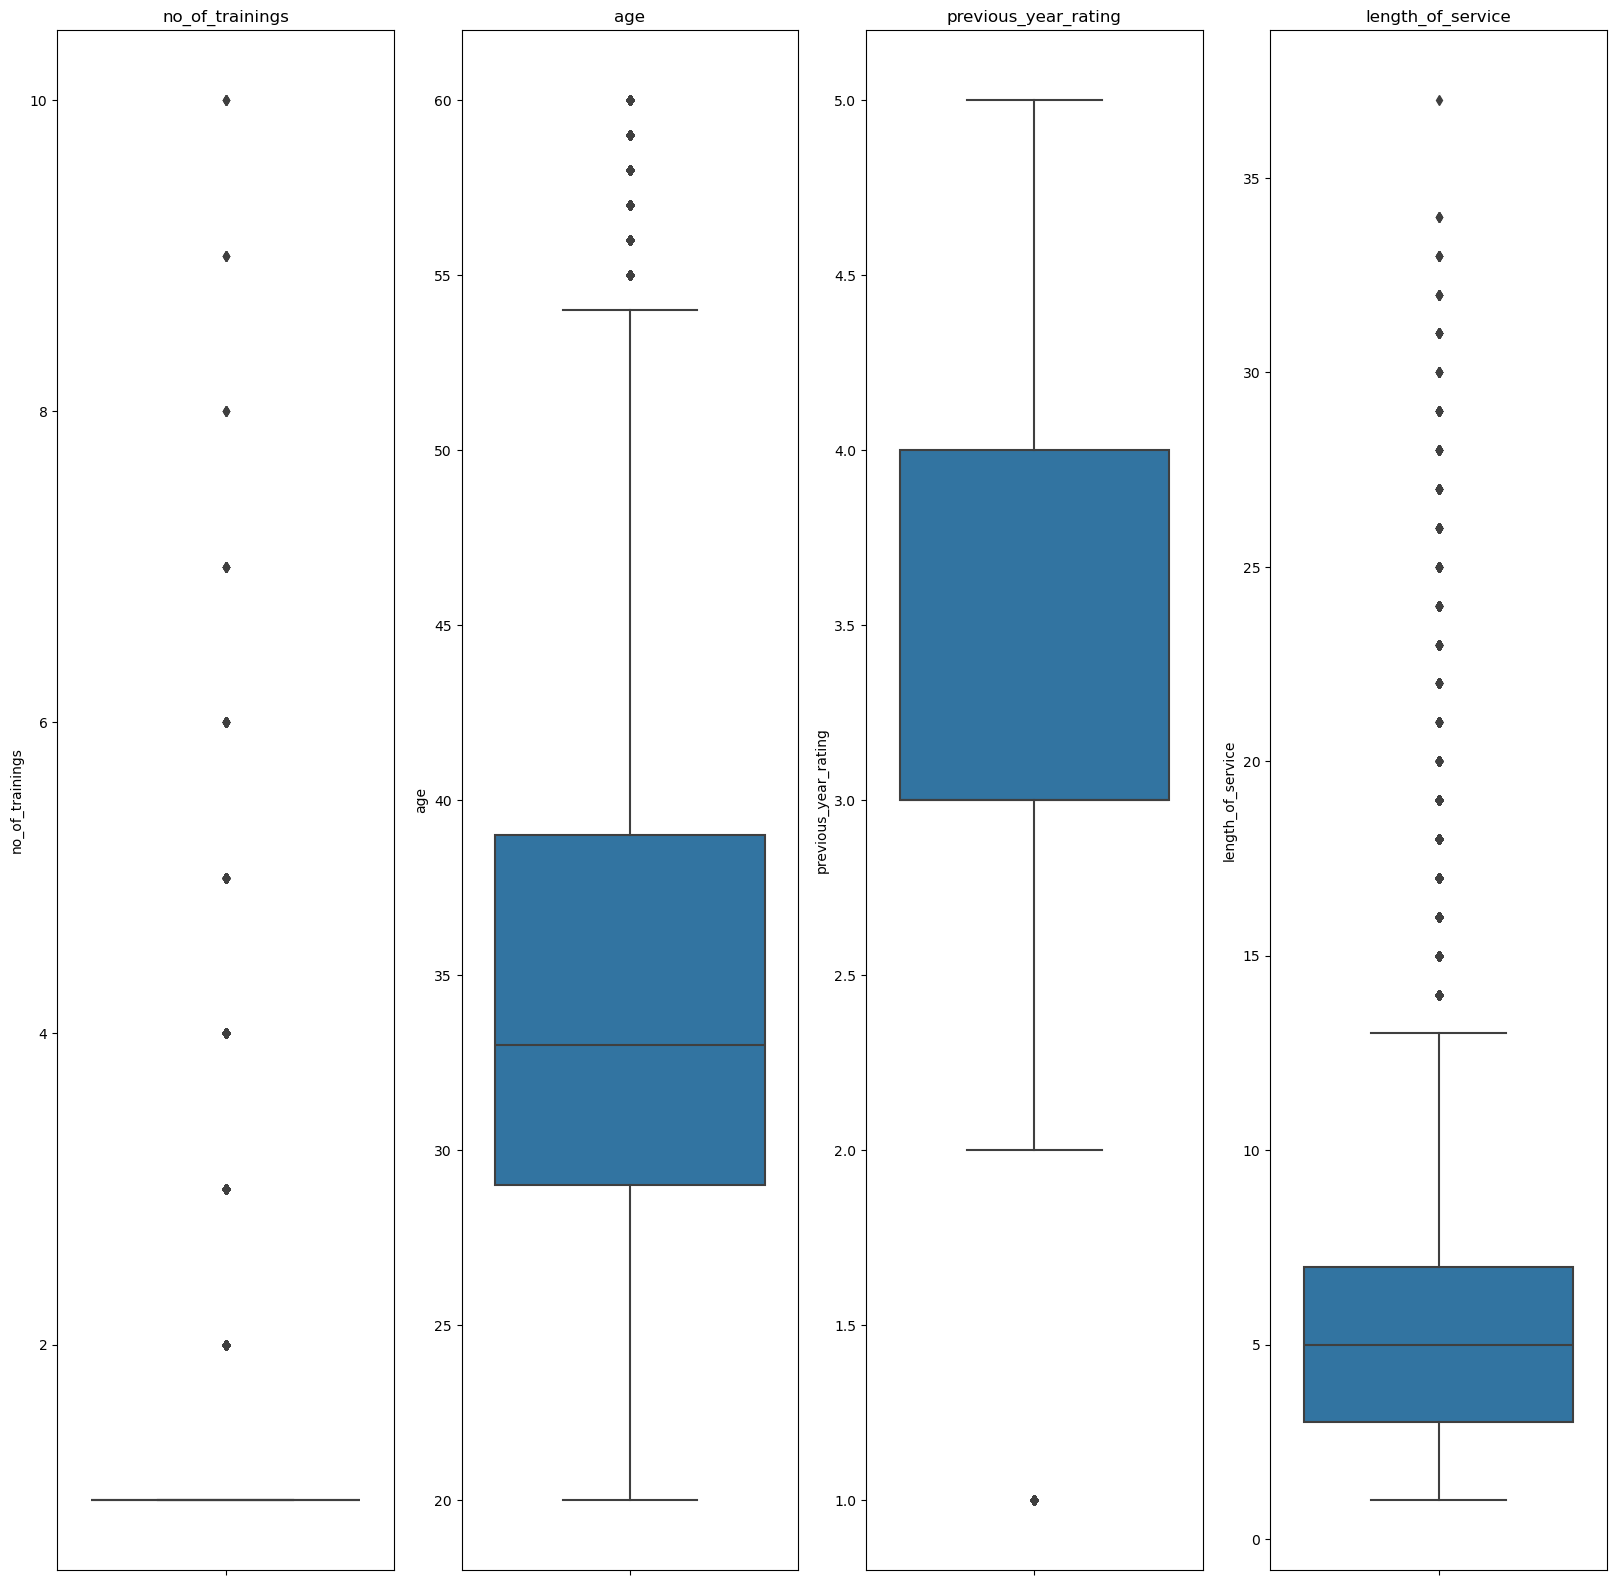

In [43]:
numerical_columns = train.select_dtypes(include=np.number).drop(columns=['is_promoted']).columns
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,20))

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=train, y=col, ax=ax[i])
    ax[i].set_title(col)
plt.show()

Text(0.5, 1.0, 'Avg Training Score Vs Promotion')

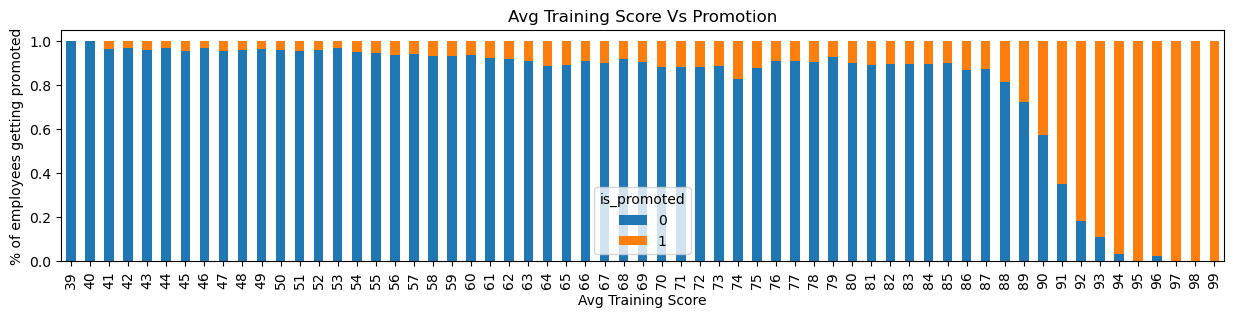

In [55]:
y=train.groupby(['avg_training_score','is_promoted'])['is_promoted'].count().unstack().fillna(0)
y1=y.div(y.sum(1).astype('float'), axis = 0)
y1.plot(kind = 'bar', stacked = True, figsize = (15, 3))
plt.xlabel('Avg Training Score')
plt.ylabel('% of employees getting promoted')
plt.title("Avg Training Score Vs Promotion")

### * There is a increase in Promotion with  increase in Avg Training Score

Text(0.5, 1.0, 'Age Vs Promotion')

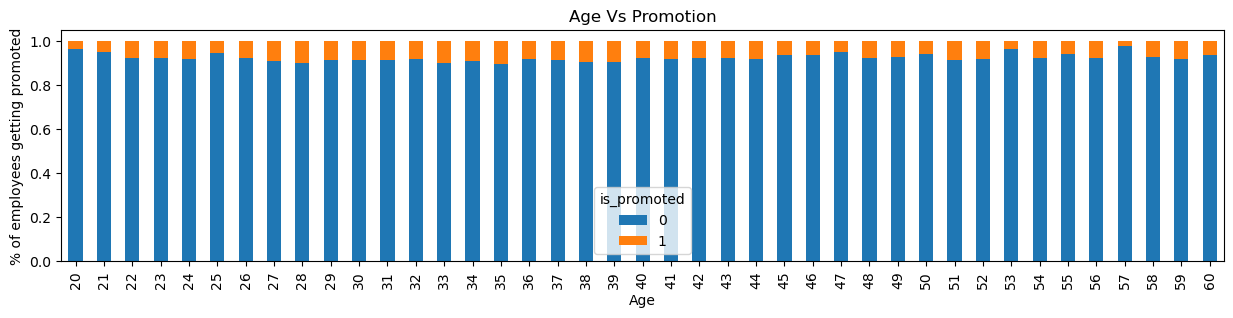

In [53]:
y_02=train.groupby(['age','is_promoted'])['is_promoted'].count().unstack().fillna(0)
y2=y_02.div(y_02.sum(1).astype('float'), axis = 0)
y2.plot(kind = 'bar', stacked = True, figsize = (15, 3))
plt.xlabel('Age')
plt.ylabel('% of employees getting promoted')
plt.title("Age Vs Promotion")

### * Age has limited effect on Promotion

Text(0.5, 1.0, 'Length of Service Vs Promotion')

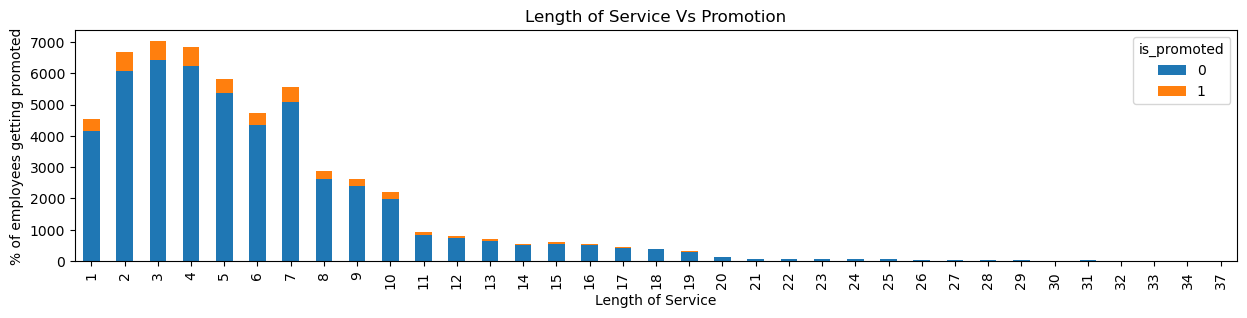

In [57]:
y_03=train.groupby(['length_of_service','is_promoted'])['is_promoted'].count().unstack().fillna(0)
y3=y_03.div(y_02.sum(1).astype('float'), axis = 0)
y_03.plot(kind = 'bar', stacked = True, figsize = (15, 3))
plt.xlabel('Length of Service')
plt.ylabel('% of employees getting promoted')
plt.title("Length of Service Vs Promotion")